# Connect google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Make classification

In [2]:
from sklearn.datasets import make_classification
import numpy as np

In [3]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

# Show data points

In [5]:
import matplotlib.pyplot as plt


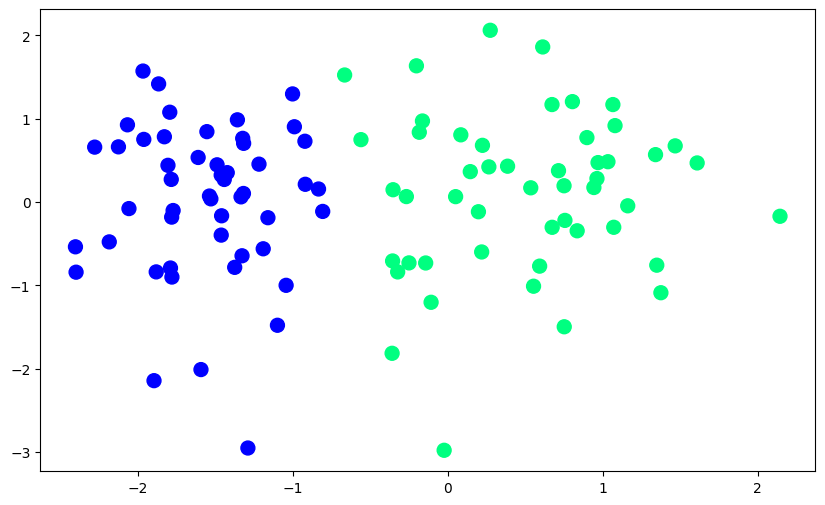

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

# Make perceptron

In [14]:
def perceptron(X, y):
    # Add a bias term (intercept) to the feature matrix X by inserting a column of 1s at the start.
    X = np.insert(X, 0, 1, axis=1)

    # Initialize weights to ones. The size of weights is the number of features in X plus one (for the bias).
    weights = np.ones(X.shape[1])

    # Set the learning rate to 0.1.
    lr = 0.1

    # Loop for a fixed number of iterations (1000 in this case) to update weights.
    for i in range(1000):
        # Select a random index between 0 and 99 (assuming there are 100 samples in X).
        j = np.random.randint(0, 100)

        # Compute the prediction using the step function.
        # The step function returns 1 if the dot product is positive and 0 otherwise.
        y_hat = step(np.dot(X[j], weights))

        # Update the weights based on the difference between the actual and predicted values.
        # The formula for weight update is: weights = weights + learning_rate * (y - y_hat) * X.
        weights = weights + lr * (y[j] - y_hat) * X[j]

    # Return the bias term (weights[0]) and the remaining weights as a tuple.
    return weights[0], weights[1:]


In [15]:
def step(z):
    # If the input 'z' is greater than 0, return 1 (indicating a positive class).
    # Otherwise, return 0 (indicating a negative class).
    return 1 if z > 0 else 0


In [16]:
# Call the perceptron function with feature matrix 'X' and target vector 'y'.
# The perceptron function returns a tuple containing:
#   - 'intercept_': the bias term (or intercept) learned by the perceptron.
#   - 'coef_': an array of the weights (coefficients) for each feature in 'X'.
intercept_, coef_ = perceptron(X, y)


In [10]:
print(coef_)
print(intercept_)

[1.36525311 0.09201098]
1.0


In [17]:
# Calculate the slope (m) of the decision boundary using the coefficients.
# m is derived from the negative ratio of the first weight (coef_[0]) to the second weight (coef_[1]).
m = -(coef_[0] / coef_[1])

# Calculate the y-intercept (b) of the decision boundary using the intercept term.
# b is derived from the negative ratio of the intercept to the second weight (coef_[1]).
b = -(intercept_ / coef_[1])


In [18]:
# Generate 100 evenly spaced values between -3 and 3 for plotting the decision boundary.
x_input = np.linspace(-3, 3, 100)

# Calculate the corresponding y values using the equation of the line: y = m*x + b.
y_input = m * x_input + b

(-3.0, 2.0)

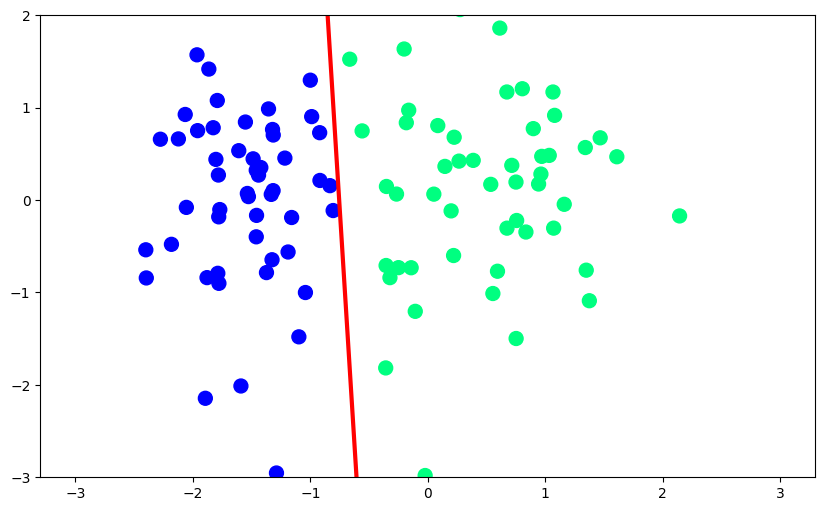

In [19]:
# Create a plot with a figure size of 10x6 inches.
plt.figure(figsize=(10, 6))

# Plot the decision boundary as a red line with a thickness of 3.
plt.plot(x_input, y_input, color='red', linewidth=3)

# Plot the data points as a scatter plot.
# The points are colored based on their class labels 'y' using the 'winter' colormap.
# 'X[:, 0]' and 'X[:, 1]' represent the feature columns.
# 's=100' sets the size of the scatter plot points.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

# Set the y-axis limits of the plot from -3 to 2 to ensure better visualization.
plt.ylim(-3, 2)